# Weeks 2 & 3 Summary of Major Concepts

_Modified by Jeff Hale_

## Pandas

- **Explain the difference: Series vs DataFrame.**
  - Series : One-dimensional ndarray with axis labels (including time series)
  - DataFrame : Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).   Its composed of several series whose y axis labels interact for consistancy.
- Describe basic characteristics of DataFrames.
  - Pandas The Python equivalent of an Excel spread sheet.  Pandas DFs have dozens and dozens of methods to interact with the data and attributes to describe the data. Pandas is our bread and butter for data manipuation.
- Practice plotting with panda
  - We can call the `.plot(kind='')` method on our pandas series and DataFrames. We can pass a plot kind using the parameter. Some of the popular selections for `kind` are bar, line, box, scatter, and hist.
- Series axis 1 vs 0
    - `axis = 1` typically relates to column organization
    - `axis = 0` typically relates to row organization
    
    - This can get confusing when you are doing an operation along a column or along the rows. ☝️
    
- Understanding Pandas datatypes
    - Pandas follows Python and NumPy dtypes, but has some of it's own.  A column or series can only contain a single dtype inside of it.  Common dtypes are varieties of `int`,  `float`, `object`(string), `datetime`, and 'categorical'. 
- Selection of data
  - Logical filters, called masks, can be used to select data from our DataFrame that meets certain conditions
  - First we create a mask that evaluate to true or false, e.g. `mask = (df['col_1'] > 10)`
  - Next, we pass our mask to our DataFrame to return only the data that passes our filter. `df[mask]`
  - We can use multiple masks together:
  ```python
    df[mask & mask2]
  ``` 
  returns the data where *both* mask *and* mask2 are true
  
  - Similarly:
  ```python
    df[mask | mask2]
  ``` 
  returns the data where *either* mask *or* mask2 are true
    
  
- Basic Plotting
  - `df.plot(kind='...')`
  - `import matplotlib.pyplot as plot`
  - `import seaborn as sns`
    - Heatmaps, Scatter Plots, Barcharts, Histograms, BoxPlots

## Visualization

- Identify what type of visualization may be appropriate for a given scenario.
    - Histogram : Distribution of a single feature
    - Bar : Compare counts of one or more categorical features
    - Scatter Plot : Compare two numeric features
    - Pie Chart : Never
    - Box Plots : Understand the distribution of a feature
    - Line : Changes over time
- The Six Principals "Lessons" of Visualizing Data
  - Lesson 1: Understand the context. (Who, What, How)
  - Lesson 2: Choose an appropriate visual display. (What type of graph?)
  - Lesson 3: Eliminate clutter. (What can I delete or make more subtle?)
  - Lesson 4: Focus attention where you want it. (How do I emphasize important things?)
  - Lesson 5: Think like a designer. (How do I organize my visualization?)
  - Lesson 6: Tell a story! (How do I communicate my visualization?)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.__version__

'0.10.0'

In [4]:
pd.__version__

'1.0.3'

### Load the data from Seaborn. Seaborn has a loading utility to help.

In [19]:
df=sns.load_dataset('mpg')

In [20]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


### Scatterplot
Scatterplots help us to more closely examine the relationship between two numeric columns. 

#### Using MatPlotLib 

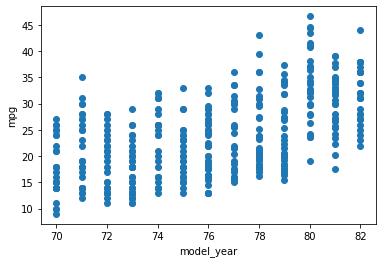

In [13]:
plt.xlabel('model_year');
plt.ylabel('mpg');
plt.scatter(df['model_year'], df['mpg']);

#### Using pandas

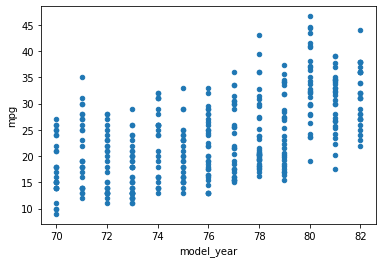

In [17]:
df.plot(kind='scatter', x='model_year', y='mpg', title='MPG Increasing');

#### Histogram

Bin counts of a single column.

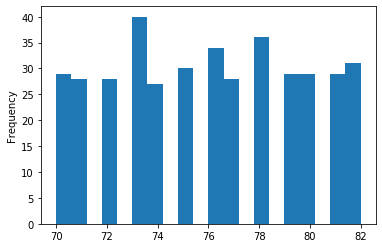

In [62]:
df['model_year'].plot(kind='hist', bins=20);

Use a groupby to make find the average mpg by origin.

In [35]:
df_origin = df.groupby('origin').mean()
df_origin

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442


#### Bar plot

Use with categorical data.

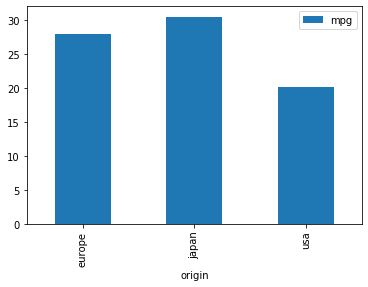

In [43]:
df_origin.plot(kind='bar', y='mpg', use_index=True) 
# https://stackoverflow.com/a/39536653/4590385

Or, using vanilla matplotlib

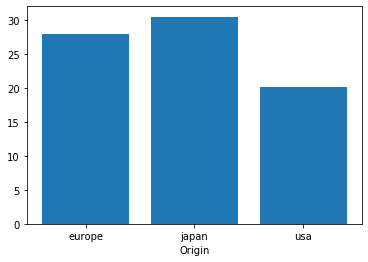

In [49]:
plt.bar(df_origin.index, df_origin['mpg'])
plt.xlabel('Origin');

#### Boxplot

Use, when you would use a scatter plot but want to see the distribution with some more statistical information at the same time.

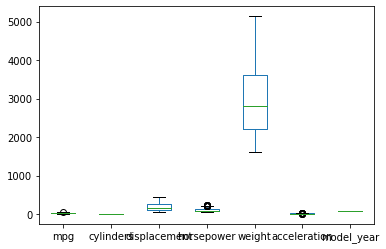

In [51]:
df.plot(kind='box')

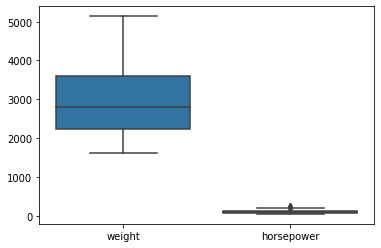

In [56]:
sns.boxplot(data=df[['weight', 'horsepower']])

#### Line chart

Use for data that changes over time.

Display a count of records by year.

In [59]:
df_year = df.groupby('model_year').count()
df_year

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
model_year,,,,,,,,
70,29,29,29,29,29,29,29,29
71,28,28,28,27,28,28,28,28
72,28,28,28,28,28,28,28,28
73,40,40,40,40,40,40,40,40
74,27,27,27,26,27,27,27,27
75,30,30,30,30,30,30,30,30
76,34,34,34,34,34,34,34,34
77,28,28,28,28,28,28,28,28
78,36,36,36,36,36,36,36,36


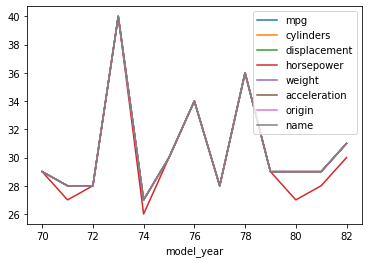

In [60]:
df_year.plot()

### Correlation Heatmap
A correlation heatmap gives us insight into the strength and sign of relationships between numeric columns in our dataset. We can use it to identify predictor variables with large effects on our target. 

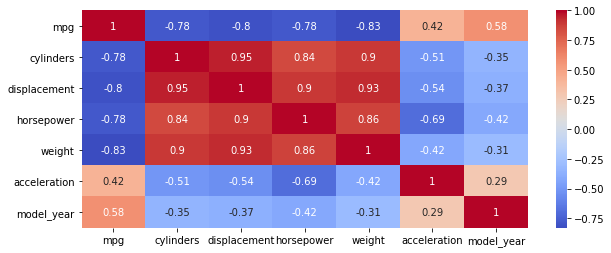

In [9]:
plt.figure(figsize=(10,4));

sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

### Pairplot
A pairplot will include scatterplots describing the relationship between the numeric columns, and the distributions for those columns will appear along the diagonal.

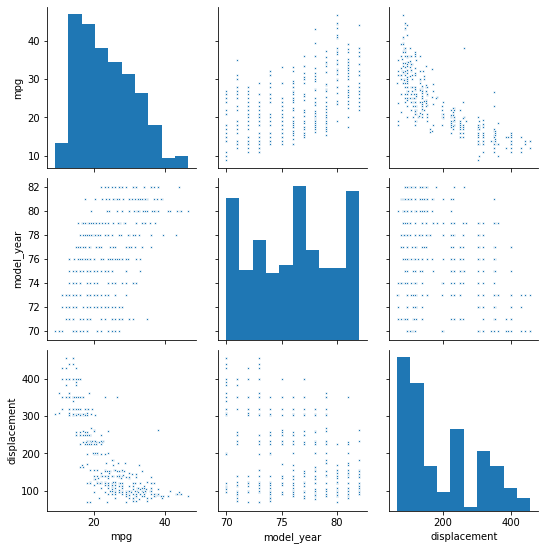

In [10]:
sns.pairplot(df[['mpg', 'model_year', 'displacement', 'name']], plot_kws={"s": 5});

## Exploratory Data Analysis

- Quickly describe a dataset, including data types, missing values and basic descriptive statistics

- df.info()

- df.describe()

- df.dtypes

- df.isnull().sum()
- Rename columns (series) in a DataFrame
  - ```python
  df.columns = ['new', 'full', 'list', 'of', 'column', 'names']
  ```
  - ```python
  df.rename(columns={'single_old_column': 'new_name', 'other_old_column': 'new_name2'}, inplace=True)
  ```
  


## Central Limit Theorm & Confidence Intervals

- Define and describe sampling distribution.
  - For some random variable x in a population: if we take the mean of a random sample of size n, and repeat that process for every possible sample of size n, the distribution of those means is called the sampling distribution of x. 
  
  
- Standard error of the mean.
  - The standard error of the mean quantifies the spread of the sampling distribution. 

         
- Describe the Central Limit Theorem.
  - The Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution.
  
  
- Describe and calculate confidence intervals for the mean.
  - A confidence interval describes the set of possible values for a parameter, based on a statistic. It is calculated by taking our statistic and adding/subtracting an error term based on the degree of certainty we want
$$ \text{CI} = \text{point estimate} \pm \text{multiplier} \cdot \text{standard error} $$
$$\text{CI} = \bar{x} \pm z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$$
  - If we want our confidence level — i.e., how confident we are that the true value of the parameter lies within the confidence interval — to be:
    - **90%**: The z-score multiplier should be **z = 1.645**, because 90% of the area under the $Z \sim N(0, 1)$ normal distribution lies between -1.645 and 1.645.
    - **95%**: The z-score multiplier should be **z = 1.96**, because 95% of the area under the $Z \sim N(0, 1)$ normal distribution lies between -1.96 and 1.96.
    - **99%**: The z-score multiplier should be **z = 2.575**, because 99% of the area under the $Z \sim N(0, 1)$ normal distribution lies between -2.575 and 2.575.
    
    
- Interpret the meaning of the confidence interval

  - We can have a certain degree of confidence that our population parameter lies within a certain range of our calculated sample statistic, called the confidence interval. 
  
  - For example, if we calculate the 95% confidence interval for our sample mean, we are saying we can be 95% confident that the true population mean falls within that interval. 

## Linear Regression
- Understand modeling, inference from models, and prediction
  - Modeling: defining a relationship between variables which can then be used for inference or predictions. 
  - Inference: Using our model to draw conclusions or to support a claim.
  - Prediction: Using our model to guess the outcome of a new observation, given the predictor variables
- Understand the framework of regression modeling
- Understand simple linear regression and linear relationships between variables
  - Linear relationships between variables: proportionality, direct effect, consistent relationship.
  - Simple Linear Regression: Linear regression is a statistical method that allows us to study and summarize relationships between variables. Simple Linear regression uses only one predictor variable.
- Learn how to find the best slope and intercept for simple linear regression
    - Given variables:
      - $\bar{y}$ : the sample mean of observed values $Y$
      - $\bar{x}$ : the sample mean of observed values $X$
      - $s_Y$ : the sample standard deviation of observed values $Y$
      - $s_X$ : the sample standard deviation of observed values $X$
      - $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$
  
    - The equations for the intercept and slope that minimize the RSS is:
    $$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$
    
   $$ \hat{\beta}_1 = r_{XY} \frac{s_Y}{s_X}$$
   
- Be able to interpret the results of simple linear regression
  - Slope: For every single unit increase in our predictor variable, we can expect an increase in our target equal to the slope.
  - Intercept: When the value of our predictor is 0, the base prediction we make is the intercept
  

- There are some **critical assumptions** involved in SLR that **you should be aware of**:
  1. **Linearity:** Y and X must have an approximately linear relationship.
  2. **Independence:** Errors (residuals) $\varepsilon_i$ and $\varepsilon_j$ must be independent of one another for any $i \neq j$.
  3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.
  4. **Equality of Variances** (Homoscedasticity of errors): The errors (residuals) should have a roughly consistent pattern, regardless of the value of X. (There should be no discernable relationship between X and the residuals.)
  

- Like SLR, there are assumptions associated with MLR. Luckily, they're quite similar to the SLR assumptions.
  1. **Linearity:** $Y$ have an approximately linear relationship with each independent $X_i$.
  2. **Independence:** Errors (residuals) $\varepsilon_i$ and $\varepsilon_j$ must be independent of one another for any $i \ne j$.
  3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.
  4. **Equality of Variances**: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X_i$ predictors. (There should be no discernable relationship between the $X$ predictors and the residuals.)
  5. **Independence of Predictors**: The independent variables $X_i$ and $X_j$ must be independent of one another for any $i \ne j$.

### $$\hat{y} = X \beta$$

**Note:** $\beta$ in the formula above is a *vector* of coefficients now, rather than a single value. In different notation we could write $\hat{y}$ calculated with:

### $$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p $$

## Model Evaluation Metrics

- **Residual Sum of Squares**: Identical to the sum of squared error (SSE). Take the difference between each prediction and the actual value, square it, and sum all of those squares.

$$RSS = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 $$

- **Mean Squared Error**: Our RSE/SSE from above, divided by the number of observations in our dataset.

$$MSE(\mathbf{y},\hat{\mathbf{y}}) = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

- **Root Mean Squared Error**: Take the square root of our MSE

$$RMSE(\mathbf{y},\hat{\mathbf{y}}) = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

- **Coefficient of Determination, $R^2$**: quantifies the amount of variance that our model explains *compared to the null model* (predicting the mean everytime). A model with a positive $R^2$ is said to explain more of the data's variance than our null model, while a negative $R^2$ indicates our model performs worse than the null model.

$$R^2 = \frac{\text{Explained variance}}{\text{Total variance}} = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2} = 1 - \frac{SSE}{SST} $$

## Decomposing error, $E[SSE]$

The expected values of SSE, decomposes into 3 components:

1. **Bias** (aka $bias^2$)
> $(E[\hat{y}] - y)^2$
>
> How much predicted values differ from true values.
1. **Variance** 
> $E[(\hat{y} - E[\hat{y}])^2]$
>
> How much do predictions differ. 
1. **$\sigma^2$**: Irreducible Error

<center><h2> $E[SSE] = \text{bias}^2 + variance + \sigma^2$</h2></center>


> **Irreducible error(s):**
>
> - Error that cannot be reduced by model improvement.
> - Error due to randomness or natural variability in an existing system.

## Bias-Variance Terminology

- **Bias**: The average difference between our model $\hat{y}$ and the truth $y$
  - No bias: On average, our predictions are correct.
  - As bias increases, our predictions, on average, get more and more incorrect.
  - High bias: Low accuracy model, underfit.

- **Variance**: The amount of variation in our model.
  - No variance: Our predictions consistently hit the same value.
  - As variance increases, our predictions get more and more spread out.
  - High variance: High accuracy model, overfit.

![Ridge vs. Variance](https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg)

## Increasing Model Complexity
- Bias decreases
- Variance increases (the model is more squiggly)

![What does this look like?](https://cdn-images-1.medium.com/max/1600/1*x8CBE7eAbaifwM15KNHuUA.png)

## K-Fold Cross-Validation

---

K-fold cross-validation takes the idea of a single train/test split and expands it to *multiple tests* across different train/test splits of your data.

For example, if you determine your training set will contain 80 percent of the data and your testing set will contain the other 20 percent, you could have five different 80/20 splits in which the test set in each is a different set of observations. We have:
- Five (K=5) training sets.
- Five (K=5) corresponding testing sets.

**K-fold cross-validation builds K models — one for each train/test pair — and evaluates those models on each respective test set.**


![image.png](https://i.snag.gy/o1lLcw.jpg)


## Hold-Out Sets (Test set first, then cross validation on the training set)


![https://scikit-learn.org/stable/_images/grid_search_cross_validation.png](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)
---

To create a hold-out set, you:

1) **Split data into a large training and a small testing set. This small testing set will be the "hold-out" set.**

2) **For a set of different model hyperparameters:**

    1) Set up the model.
    2) Cross-validate the current model on the training data.

3) **Select the model that performed best using cross-validation on the training data.**

4) **Perform a final test of that model on the original "hold-out" test set.**

> **Note:** The "hold-out" method is more conservative, but also requires you to have more data. With smaller data sets it can be infeasible.


---

## Hypothesis Testing
---
#### For basic experiments

- Define the null and alternative hypotheses.
  - The null hypothesis is the default position we take, stating that there is no significant difference between two populations. 
  - The alternative hypothesis is the assertion we are trying to test, stating that there is a significant difference between our two populations.
- Perform a two-sample t-test.

- Define the t-statistics and p-value.
  - A t-statistic is a standardized metric measuring the difference between two samples, accounting for the variance of the two samples. 
### $$t = \frac{\bar{x}_E - \bar{x}_C}{\sqrt {s^2 (\frac{1}{n_E} + \frac{1}{n_C})}}$$
<br>

    - $\bar{x}_E$ is the mean of our experimental group's sample measurements and $\bar{x}_C$ is the mean of our control group's sample measurements.
    
    - $n_E$ and $n_C$ are the number of observations in each group. 
    
    - The $s^2$ denotes our *sample variance*. We are assuming equal variances in our experimental and control groups in the overall population. There is another way to calculate the t-test where equal variance is not assumed, but, in our case, it is a reasonable assumption.
    
    <br>
    $$ s^2 = \text{sample variance} = \frac{\sum_{i=1}^{n_E} (x_i - \bar{x}_E)^2 + \sum_{j=1}^{n_C} (x_j - \bar{x}_C)^2}{ n_E + n_C -2} $$

  -  A p-value gives us insight into the significance of our results, and describes the probability that our results could have been achieved through random sampling. This p-value is then compared to our pre-defined level of significance to determine if the null-hypothesis is rejected or not. 
    - When our p-value is less than our significance level, meaning that the probability of achieving our results from random sampling is low enough, we can reject the null hypothesis
    - If the p-value is greater than our significance level, we fail to reject the null hypothesis because the chance that our results are due to random sampling is to high.
<br>
- List the steps of hypothesis testing:
    1. Construct a null hypothesis and its complement, the alternative hypothesis. The null hypothesis in an experiment is generally that there is no significant difference between the treatment group and the control group.
    2. Specify a level of significance.
    3. Calculate your point estimate(s).
    4. Calculate your test statistic.
    5. Find your $p$-value and make a conclusion.